In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [29]:
# we will work only with Applicant Income and Loan Amount
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head()

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0
2,2583,120.0
3,6000,141.0
4,2333,95.0


In [30]:
# convert data to numpy arrays
X = data.values
print(X[:2])

[[4583.  128.]
 [3000.   66.]]


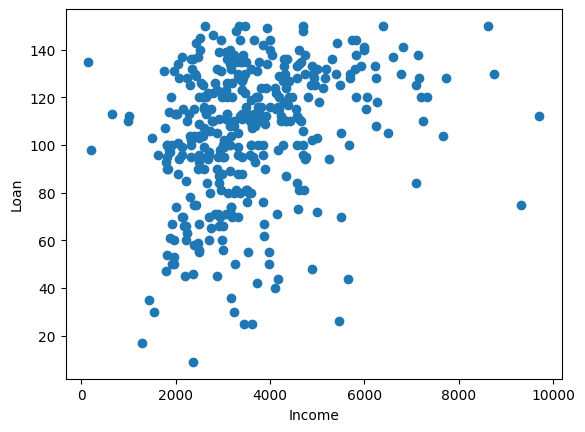

In [36]:
# view the scatter plot of our dataset
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Income")
plt.ylabel("Loan")
plt.show()

In [43]:
# k-means clustering main function
import random
def kmeans(X, k):
        flag = True
        cluster = np.zeros(X.shape[0])

        # select k random centroids
        random_indices = np.random.choice(len(X), size=k, replace=False)
        centroids = X[random_indices, : ]

        # loop 
        while flag:
            for i, row in enumerate(X):
                    minimum_distance = float('inf')
                    # calculate distance of this point from all centroids
                    for idx, centroid in enumerate(centroids):
                            distance = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                            # store the minimum distance
                            if minimum_distance > distance:
                                minimum_distance = distance
                                cluster[i] = idx
            # update the centroids
            new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
            # if no new centroids then stop!
            if np.count_nonzero(centroids-new_centroids) == 0:
                flag = False
            else:
                centroids = new_centroids

        return centroids, cluster

In [39]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
      sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  
  return sum

In [44]:
# we will apply "Elbow method to find the value of K"
# WCSS finds how tightly the values of a cluster are cuppled to it's centroid  
# it measures nothing but the distance between the values of cluster from centroid
cost_list = []

for k in range(1, 10):
  
  centroids, cluster = kmeans(X, k)
  
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(X, centroids, cluster)
  cost_list.append(cost)

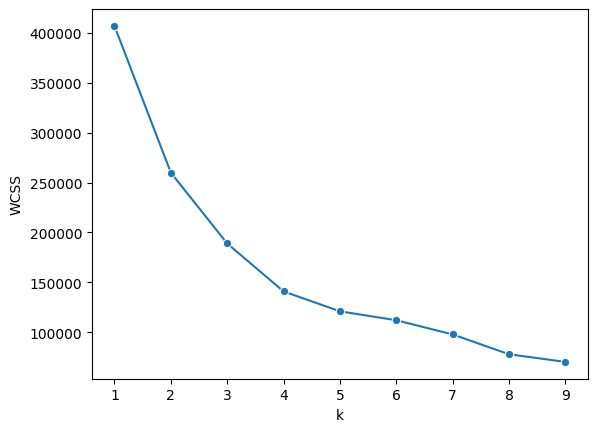

In [46]:
# now we will see the WCSS graph
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [47]:
###### As k increases, the WCSS generally decreases, but at some point, the rate of decrease in WCSS starts to slow down,
###### and adding more clusters does not significantly improve the quality of the clustering. 
###### The elbow point in the plot of WCSS vs. k is typically chosen as the optimal number of clusters for the given dataset.


## >> here we see ater k=4 the value of WCSS doesn't significantly decrease
##    so we take k = 4

In [48]:
k = 4
centroids, cluster = kmeans(X, k)

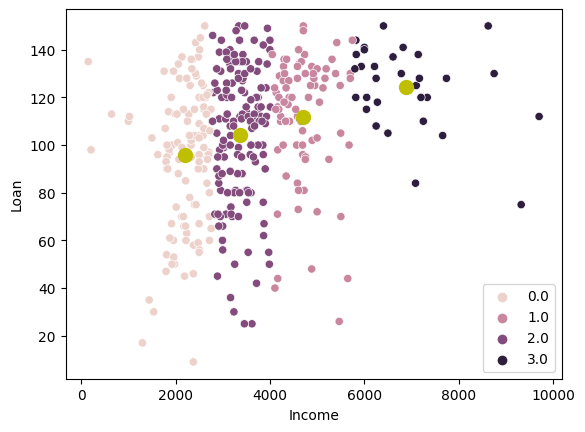

In [53]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=cluster)
plt.scatter(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()